# T-Distribution <hr style = "border:3px solid #DFC5FE"></hr>

Data Analyst: Christian C. Ortega <br>
Department: Electrical Engineering

In [12]:
# imports and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [13]:
df = pd.read_csv(r"C:\ORTEGA\L14\transformer-voltage-10-sample.csv",delimiter=",")

In [14]:
# summary of statistics
df.describe()

,Sample,Voltage
count,10.00000,10.000000
mean,5.50000,119.440000
std,3.02765,10.612487
min,1.00000,94.400000
25%,3.25000,119.950000
50%,5.50000,120.150000
75%,7.75000,120.275000
max,10.00000,139.000000


In [15]:
# t-critical for two-tailed test
alpha = 0.05
dof = df['Voltage'].count()-1

t_critical = stats.t.ppf(1-alpha/2, dof)
t_critical

np.float64(2.2621571628540993)

In [16]:
# confidence interval
ci_lower, ci_upper = stats.t.interval(
    confidence=0.95,
    df = df['Voltage'].count()-1,
    loc = df['Voltage'].mean(),
    scale = df['Voltage'].std(ddof=1)/np.sqrt(df['Voltage'].count())
)

In [17]:
ci_lower

np.float64(111.8482838462108)

In [18]:
ci_upper

np.float64(127.03171615378922)

In [19]:
print("Confidence Interval = " + str(ci_lower.round(2)) + ", " + str(ci_upper.round(2)))

Confidence Interval = 111.85, 127.03


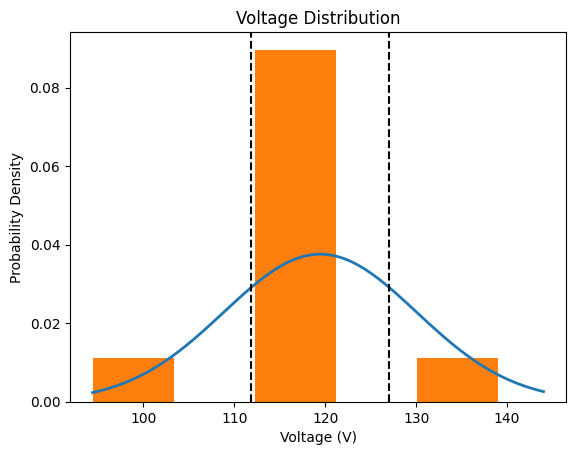

In [20]:
# Voltage Distribution
mean = df['Voltage'].mean()
std = df['Voltage'].std(ddof=1)

# x axis
x_min = df['Voltage'].min()
x_max = df['Voltage'].max() + 5

# normal distribution plot
x = np.linspace(x_min,x_max,100)
p = stats.norm.pdf(x,mean,std)
plt.plot(x,p,linewidth=2)

#histogram
plt.hist(df['Voltage'],bins=5,density=True)
plt.title('Voltage Distribution')
plt.ylabel('Probability Density')
plt.xlabel('Voltage (V)')

# confidence interval
plt.axvline(x=ci_lower,color='k',linestyle='--')
plt.axvline(x=ci_upper,color='k',linestyle='--')
plt.show()